In [82]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys

In [83]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [84]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project',
 '/home2/s20321005/Thesis-Project']

In [85]:
from utils import safe_mkdir, style

In [86]:
style()

In [87]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness-metal")
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-metal")

In [88]:
name = "Effective-Volume-metal"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume-metal already exist. Good to go!


In [89]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completene

In [90]:
name = files[2].split("/")[-1]
name

'gaia_(0.16)_(0.20).hdf5'

In [91]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


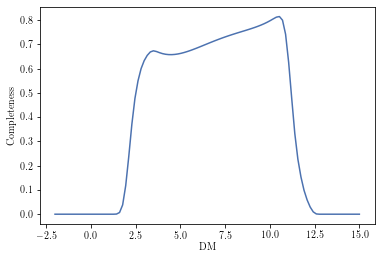

In [92]:
compDM = df_comp["compDM"].to_numpy()
DM = df_comp["DM"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

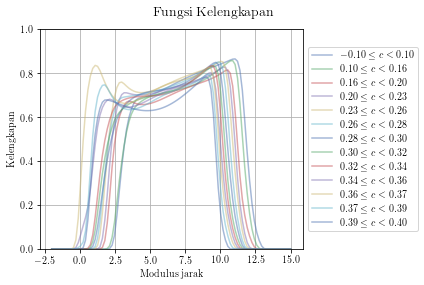

'gaia_(0.39)_(0.40).hdf5'

In [93]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(6, 4))
for file in files:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan-metal.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [94]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

compDM_interp(-20)

array(0.)

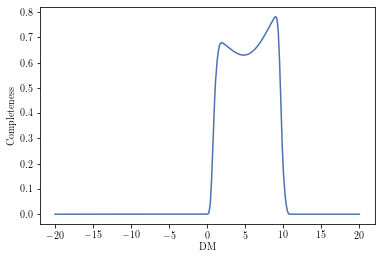

In [95]:
dms = np.linspace(-20, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [96]:
z1 = np.array([ 89. ,  96.5, 112. , 119. , 123.5, 168.5, 191. , 238.5, 262. ,
       288.5, 306. , 288.5, 286.5])

zb= 2*z1

Z = zb[0]
R = 150
zb

array([178., 193., 224., 238., 247., 337., 382., 477., 524., 577., 612.,
       577., 573.])

In [97]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [98]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        if distance>50:
            eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 357.01it/s]


(0.0, 1.0)

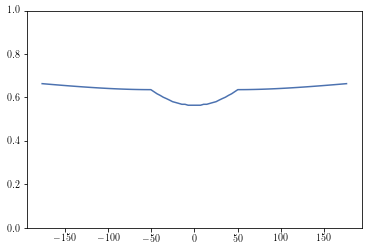

In [99]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

100%|██████████| 99/99 [00:00<00:00, 483.93it/s]


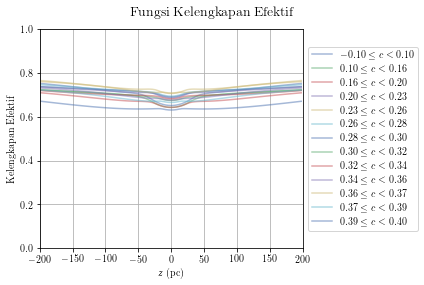

In [101]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 200
R = 150
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
for i, file in enumerate(files):
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            # if distance>50:
            #     eff_vol += dv*compDM_interp(dm)
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel(r"$z$ (pc)")
ax.set_ylabel("Kelengkapan Efektif")
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(-200, 200)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan-efektif-metal.pdf"), dpi=200)

In [102]:
compz = interpolate.interp1d(z, frac, fill_value='extrapolate', bounds_error=False)

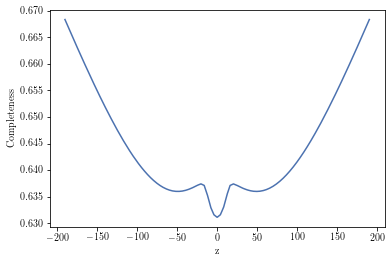

In [103]:
zz = np.linspace(-190, 190, 1000)
compzz = compz(zz)

# # plot
plt.plot(zz, compzz)
plt.xlabel("z")
plt.ylabel("Completeness")
plt.show()

In [23]:
# for latex table
# for i, zbound in enumerate(zb):
#     name = files[i].split("/")[-1] 
#     c = regex.findall(name)
#     gaia_raw = vaex.open(join(spectral_dir, name))
#     # filter no nan in 'z'
#     gaia = gaia_raw.filter("Dist>50")
#     gaia = gaia.dropna("z")
#     gaia = gaia.extract()
#     N_d_50 = len(gaia)
#     gaia = gaia_raw.filter("abs(z)<50")
#     gaia = gaia.dropna("w")
#     gaia = gaia.extract()
#     N_z_50 = len(gaia)
#     w = gaia["w"].to_numpy()

#     dispersion = np.std(w)
#     print(f"{c[0]} < c < {c[1]} & {zbound} & {N_d_50} & {N_z_50} & {dispersion:.02f} \\\\")

-0.10 < c < 0.10 & 178.0 & 1026 & 429 & 6.33 \\
0.10 < c < 0.16 & 193.0 & 909 & 310 & 7.74 \\
0.16 < c < 0.20 & 224.0 & 1451 & 467 & 8.50 \\
0.20 < c < 0.23 & 238.0 & 2727 & 819 & 9.44 \\
0.23 < c < 0.26 & 247.0 & 4446 & 1315 & 10.75 \\
0.26 < c < 0.28 & 337.0 & 4867 & 1138 & 11.97 \\
0.28 < c < 0.30 & 382.0 & 6476 & 1445 & 12.60 \\
0.30 < c < 0.32 & 477.0 & 8820 & 1569 & 13.19 \\
0.32 < c < 0.34 & 524.0 & 10114 & 1704 & 14.24 \\
0.34 < c < 0.36 & 577.0 & 12233 & 1957 & 14.46 \\
0.36 < c < 0.37 & 612.0 & 6439 & 1024 & 14.75 \\
0.37 < c < 0.39 & 577.0 & 11803 & 1894 & 14.61 \\
0.39 < c < 0.40 & 573.0 & 5753 & 905 & 15.28 \\


In [23]:
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-metal/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completene

In [104]:
name = files[0].split("/")[-1] 
# gaia_raw = vaex.open(join(spectral_dir, name))
gaia = vaex.open(join(spectral_dir, name))
gaia = gaia.dropna(['z', 'w'])
# gaia = gaia.filter("Dist>50")
# gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.01692606345950085,0.3891393605162341,7.978000164031982,7.916999816894531,AAA,2847236045035991808,7.534960746765137,0.31428973130157245,0.028740057721734047,-7.528403412132262,0.035291653126478195,5.414626649593402,0.03218960762023926,8.257993698120117,8.308849334716797,8.131924629211426,1606.518310546875,3663.614990234375,1.0435644388198853,1.1647926568984985,-1.2447639901461083,-0.6851463533673376,185.764404296875,183.57119750976562,187.21949768066406,0.40720000863075256,0.4049000144004822,0.41269999742507935,nan,nan,nan,A,--,-1.9623053073883057,gaia,0.8112114071846008,0.8112114071846008,1.0,10111.888671875,gspphot,14.7001953125,61.91796875,0.0,4.351399898529053,gspphot,0.004600048065185547,0.0062999725341796875,0.0,nan,--,nan,nan,nan,0.04969999939203262,gspphot,0.06459999922662973,0.016599997878074646,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.06100034713745117,1.6458427462058371,184.68494038736586,-116.86610814118873,143.00643333017175,-1.4773945887055326,-7.388703621087389,0.02914644273095347,0.03495678152203822,-6.468120044174079,-1.2933209995171295,-0.049143105132327135,-0.026648281766649008,-3.766716399021818,0.8112114071846008,0.5147320000869019,-5.61240292518195,0.6289117267272132,-0.5723895823176695,0.20300791047069605,-5.730978622228241,0.5958421596550898,0.5031712031916151,2.133604850608599,0.04969999939203262
1,0.0035158959649724967,0.5305083072141416,8.081000328063965,8.039999961853027,AAA,2873312200239661568,14.617414474487305,14.451251005288686,0.030547887086868286,-2.1977605786351746,0.020109251141548157,5.780108878698743,0.030021460726857185,8.32446002960205,8.370553970336914,8.213418960571289,1918.97314453125,3164.412841796875,1.0105706453323364,1.161336064338684,-1.2188784047472103,-0.5448464699442576,174.9145965576172,173.51480102539062,177.49130249023438,0.21850000321865082,0.21230000257492065,0.22370000183582306,nan,nan,nan,A,--,2.5488598346710205,gaia,0.5904097557067871,0.5904097557067871,1.0,9139.9169921875,gspphot,26.2587890625,21.2197265625,0.0,4.347700119018555,gspphot,0.006599903106689453,0.003699779510498047,0.0,nan,--,nan,nan,nan,0.040699999779462814,gspphot,0.01589999906718731,0.022099997848272324,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.0410003662109375,1.8906804241222384,173.0071216625813,-89.66730688490979,147.95687960341223,13.569288218458064,-5.435367919770953,0.030094421085801206,0.02078175176582556,-4.457293881549581,11.127545779028823,-0.028747124591811984,0.06284419546046725,-5.132948763366383,0.5904097557067871,0.306987584346683,-0.13035411751851234,0.5051422570554095,-10.490508510988937,0.18384391925197802,3.7132867437359187,0.47467831856972253,0.4207933504122871,2.028376745602959,0.040699999779462814
2,0.007327607784865514,1.0824205120699932,7.697999954223633,7.6020002365112305,AAA,429910184639924864,30.434906005859375,-9.994043222039021,0.020594893023371696,-28.747219518666515,0.023014497011899948,6.966705618099453,0.022135332226753235,8.100255966186523,8.185784339904785,7.919078350067139,1736.6217041015625,2342.297607421875,0.9306333661079407,1.1676572561264038,-1.0972707084924957,-0.005097484666529203,144.53489685058594,144.37939453125,144.69949340820312,0.6830000281333923,0.6814000010490417,0.6848999857902527,nan,nan,nan,A,--,-0.452226817607

21.05263157894737

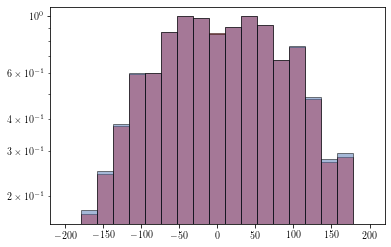

In [106]:
zedge = np.linspace(-Z, Z, 20) #edges
zmid = (zedge[:-1]+zedge[1:])/2
zs = gaia["z"].to_numpy()
dz = zedge[1]-zedge[0]
znum, _ = np.histogram(zs, bins=zedge)
zcor = znum/compz(zmid)
area = zcor.sum()*dz
zcor = zcor/area
zcor_max = zcor.max()
zcor = zcor/zcor_max
area = znum.sum()*dz
znum = znum/area
znum_max = znum.max()
znum = znum/znum_max

dz = zedge[1]-zedge[0]
plt.bar(zmid, zcor, width=dz, edgecolor="k", alpha=0.5, color="r")
plt.bar(zmid, znum, width=dz, edgecolor="k", alpha=0.5)
plt.yscale("log")
dz


# automate

In [34]:
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/gaia_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Proje

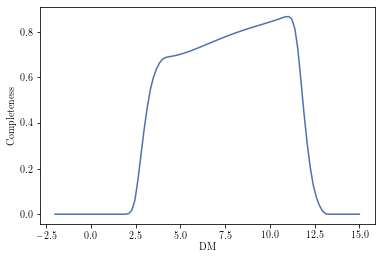

100%|██████████| 99/99 [00:00<00:00, 395.73it/s]


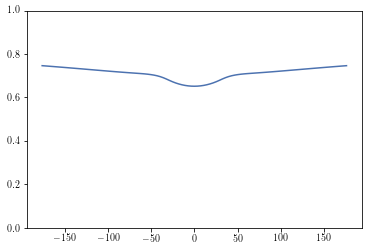

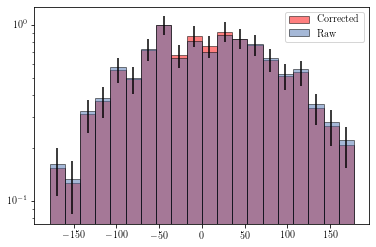

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(-0.10)_(0.10).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

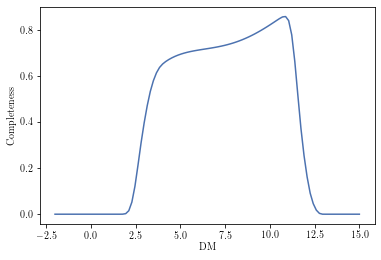

100%|██████████| 99/99 [00:00<00:00, 380.66it/s]


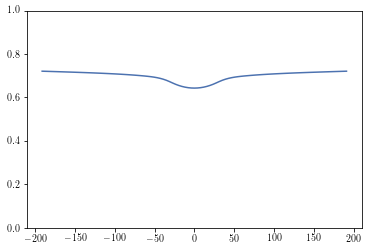

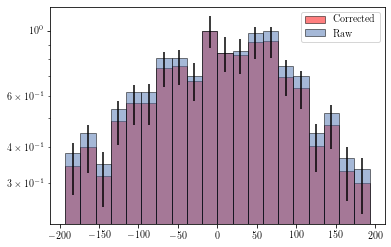

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.10)_(0.16).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

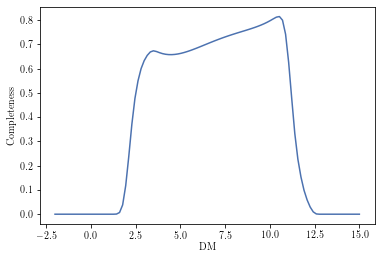

100%|██████████| 99/99 [00:00<00:00, 483.30it/s]


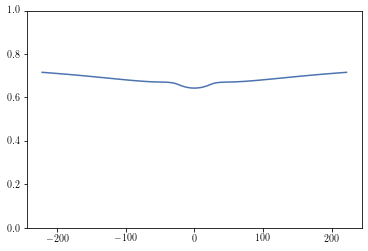

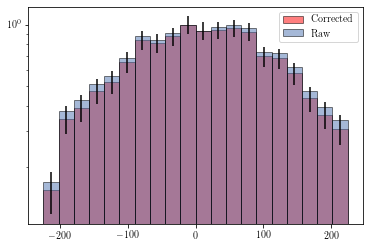

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.16)_(0.20).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

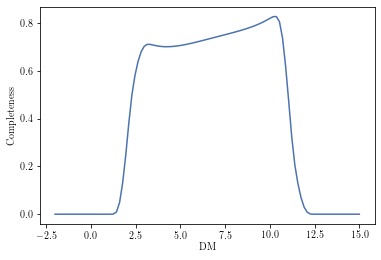

100%|██████████| 99/99 [00:00<00:00, 435.02it/s]


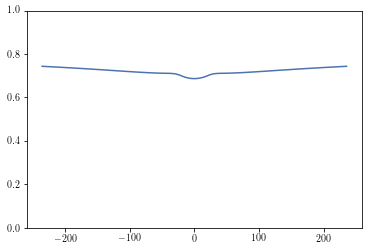

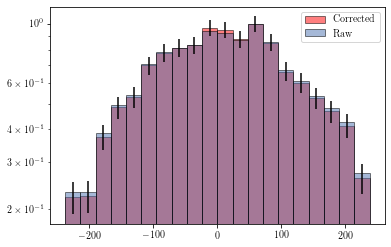

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.20)_(0.23).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

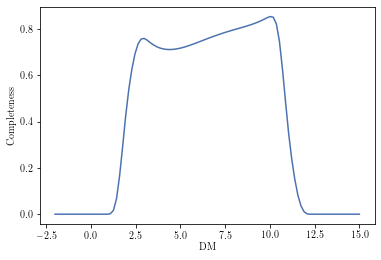

100%|██████████| 99/99 [00:00<00:00, 450.05it/s]


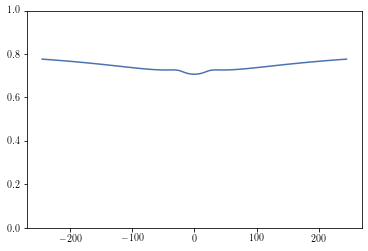

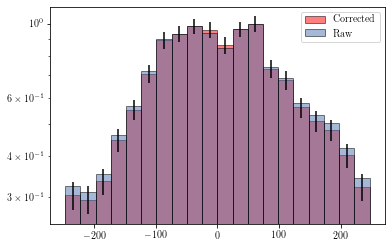

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.23)_(0.26).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

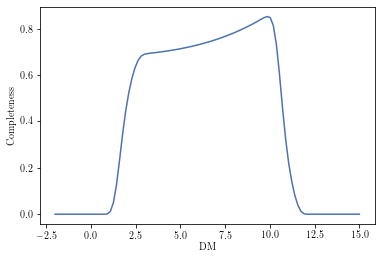

100%|██████████| 99/99 [00:00<00:00, 458.48it/s]


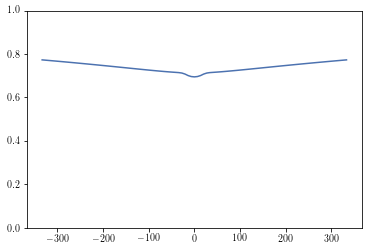

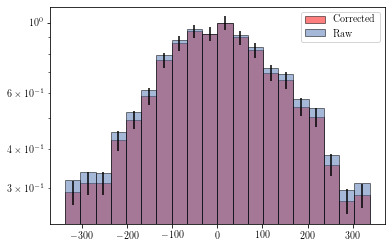

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.26)_(0.28).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

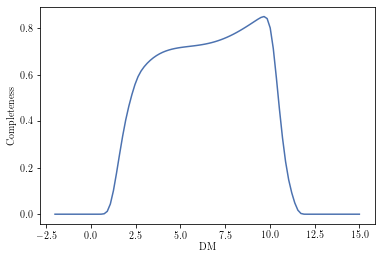

100%|██████████| 99/99 [00:00<00:00, 431.32it/s]


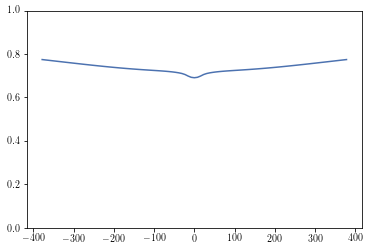

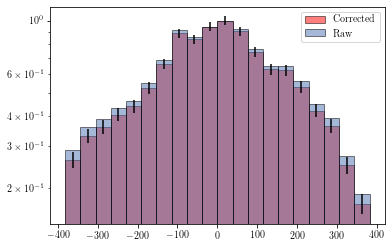

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.28)_(0.30).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

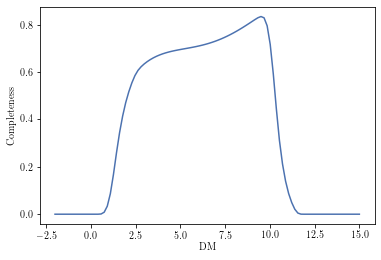

100%|██████████| 99/99 [00:00<00:00, 462.87it/s]


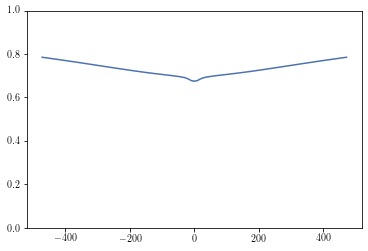

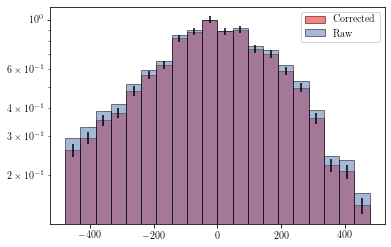

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.30)_(0.32).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

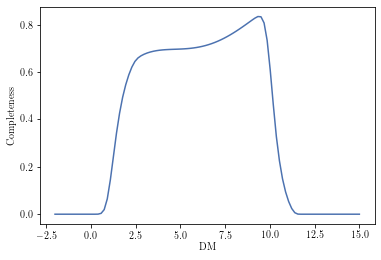

100%|██████████| 99/99 [00:00<00:00, 448.30it/s]


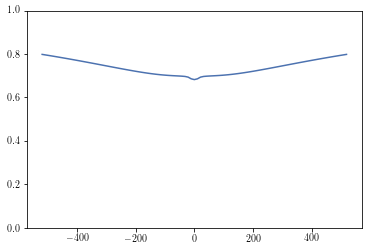

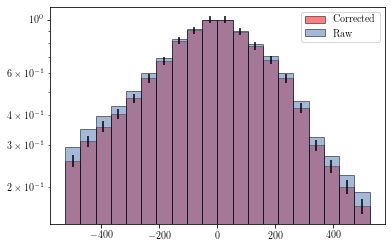

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.32)_(0.34).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

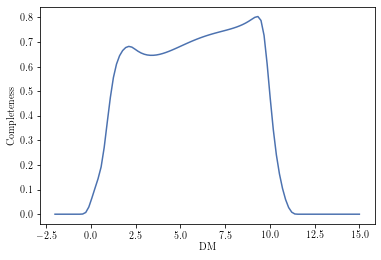

100%|██████████| 99/99 [00:00<00:00, 477.64it/s]


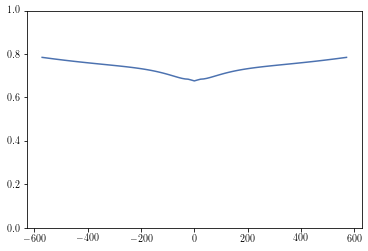

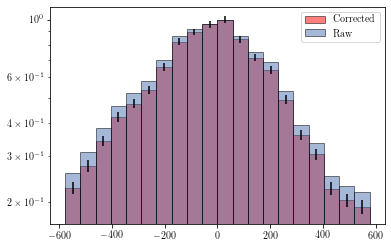

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.34)_(0.36).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

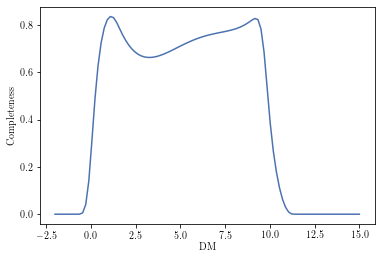

100%|██████████| 99/99 [00:00<00:00, 445.61it/s]


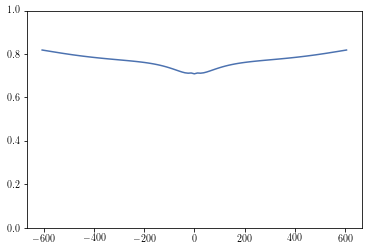

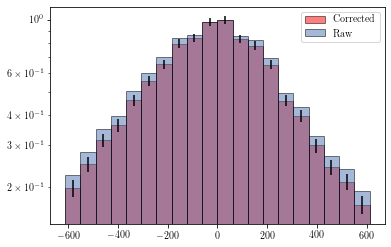

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.36)_(0.37).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

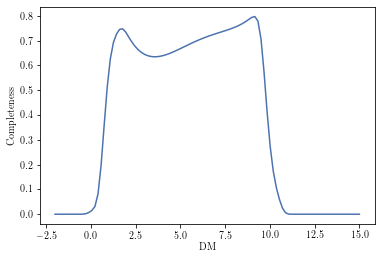

100%|██████████| 99/99 [00:00<00:00, 461.09it/s]


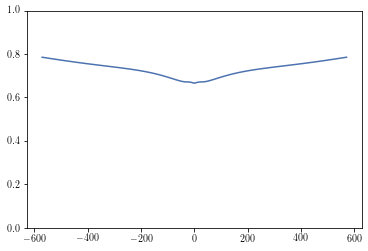

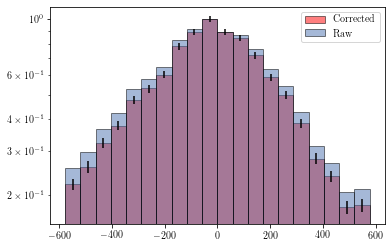

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.37)_(0.39).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

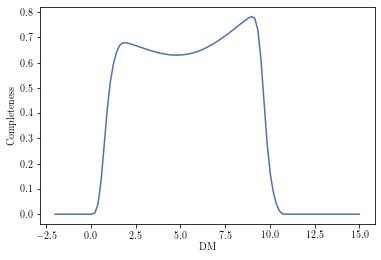

100%|██████████| 99/99 [00:00<00:00, 448.57it/s]


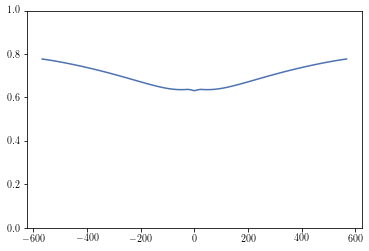

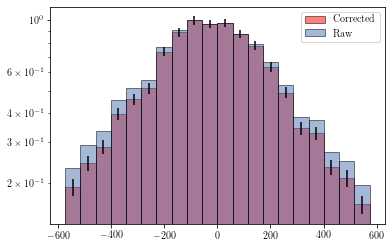

/home2/s20321005/Thesis-Project/Data/Effective-Volume-metal z_(0.39)_(0.40).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

In [108]:
R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

for file, Z in zip(files, zb):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]

    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # plot
    plt.plot(DM, compDM)
    plt.xlabel("DM")
    plt.ylabel("Completeness")
    plt.show()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            # if distance>50:
            #     eff_vol += dv*compDM_interp(dm)
            # if distance>50:
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia = vaex.open(join(spectral_dir, name))
    gaia = gaia.dropna(['z', 'w'])
    # gaia = gaia.filter("Dist>50")
    # gaia = gaia.extract()

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    dz = zedge[1]-zedge[0]
    

    znum, _ = np.histogram(zs, bins=zedge)
    zcor = znum/compz(zmid)
    zerr = zcor/np.sqrt(znum)
    max = zcor.max()
    zcor = zcor/max
    zerr = zerr/max
    max = znum.max()
    znum = znum/max


    dz = zedge[1]-zedge[0]
    plt.bar(zmid, zcor,yerr=zerr, width=dz, edgecolor="k", alpha=0.5, color="r", label="Corrected")
    plt.bar(zmid, znum, width=dz, edgecolor="k", alpha=0.5,  label="Raw")
    plt.yscale("log")
    plt.legend()
    plt.show()
    df = vaex.from_arrays(zmid=zmid, znum=zcor, zraw=znum, zerr=zerr)
    n = name.split("_")
    name = f"z_{n[1]}_{n[2]}"
    print(data_dir, name)
    df.export(join(data_dir, name), progress=True)
    # break

# all out

 92%|█████████▏| 11/12 [00:03<00:00,  3.25it/s]


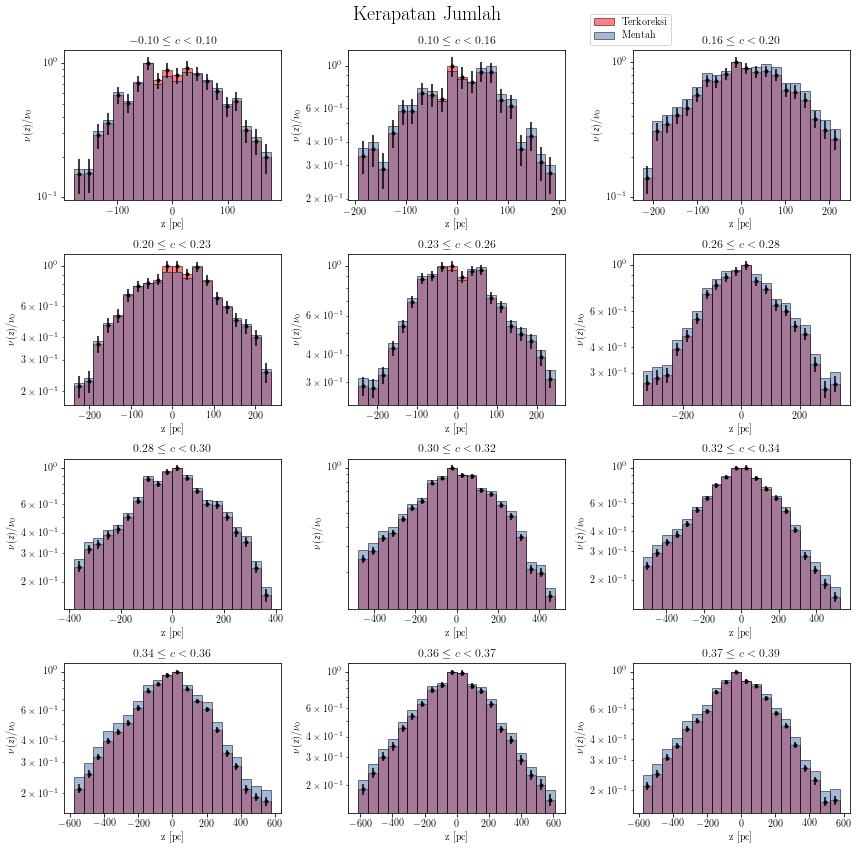

In [109]:
import re

# regex to extract the number from the file name inside ()
regex = re.compile(r"\((.*?)\)")

R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, (file, Z, ax) in enumerate(zip(files[:-1], tqdm(zb[:-1]), axes.flatten())):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in z:
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    
    zerr = znum_cor/np.sqrt(znum)
    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)

    dz = zedge[1]-zedge[0]
    ax.bar(zmid, znum_cor/znum_cor.max(), width=dz, edgecolor="k", alpha=0.5, color="r")
    ax.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
    ax.errorbar(zmid, znum_cor/znum_cor.max(), yerr=zerr/znum_cor.max(), fmt=".", color="k")
    ax.set_yscale("log")
    ax.set_title(r"${}\leq c < {}$".format(c[0], c[1]))
    ax.set_xlabel("z [pc]")
    ax.set_ylabel(r"$\nu(z)/\nu_0$")
    # df.export(join(data_dir, name), progress=True)
    if i==2:
        ax.legend(["Terkoreksi", "Mentah"], loc="lower right", bbox_to_anchor=(0.2, 1.0))
        # break
fig.tight_layout()
fig.suptitle("Kerapatan Jumlah", fontsize=20)
fig.subplots_adjust(top=0.93)
fig.savefig(join("img", "kerapatan-jumlah-metal.pdf"), bbox_inches="tight")
